In [1]:
# configurações
import pandas as pd # manipulação e análise de dados
import seaborn as sns # gráficos
import numpy as np # arranjos multidimensionais

import warnings # ignora as mensagens de alerta
warnings.filterwarnings('ignore') # ignora as mensagens de alerta

from sklearn.model_selection import train_test_split # separar os dados entre dados de treino e teste
from sklearn.linear_model import LinearRegression # regressão linear
from sklearn import metrics # metricas

In [2]:
dados = pd.read_csv('salary_data.csv') # ler os dados

In [3]:
dados.head() # visualização

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dados.info() # verificar tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
dados.isna().sum() # ver se há dados faltantes

YearsExperience    0
Salary             0
dtype: int64

In [6]:
dados.describe().round(2) # estatística descritiva

,YearsExperience,Salary
count,30.00,30.00
mean,5.31,76003.00
std,2.84,27414.43
min,1.10,37731.00
25%,3.20,56720.75
50%,4.70,65237.00
75%,7.70,100544.75
max,10.50,122391.00


In [7]:
dados.corr().round(4) # matriz de correlação

,YearsExperience,Salary
YearsExperience,1.0000,0.9782
Salary,0.9782,1.0000


Text(0, 0.5, 'Salário ($)')

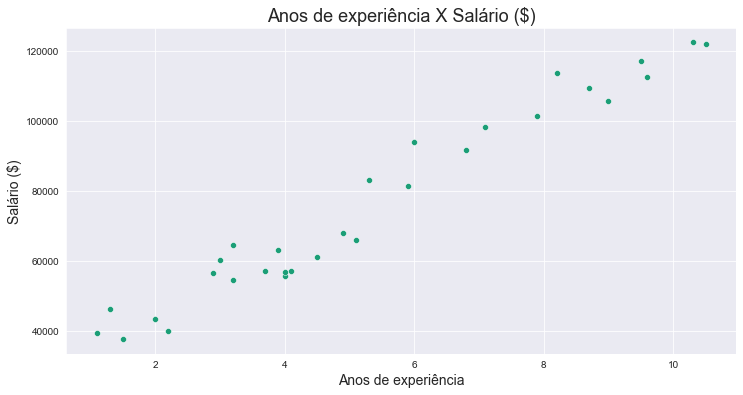

In [8]:
sns.set_palette("Dark2") # estilo do gráfico (Seaborn)
sns.set_style("darkgrid") # estilo do gráfico (Seaborn)
ax = sns.scatterplot(data=dados, x="YearsExperience", y="Salary") # gráfico de dispersão
ax.figure.set_size_inches(12, 6)
ax.set_title('Anos de experiência X Salário ($)', fontsize=18)
ax.set_xlabel('Anos de experiência', fontsize=14)
ax.set_ylabel('Salário ($)', fontsize=14)

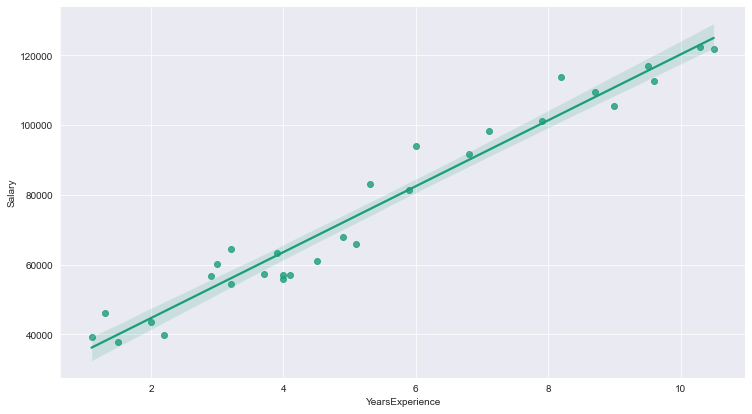

In [9]:
ax = sns.lmplot(x="YearsExperience", y="Salary", data=dados).figure.set_size_inches(12, 6)

In [10]:
# Separar os dados (X e Y)
X = dados['YearsExperience']
y = dados['Salary']

In [11]:
# separar os dados entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
# ajustar a dimensionalidade
X_train = np.array(X_train)[:, None]
X_test = np.array(X_test)[:, None]

In [13]:
modelo = LinearRegression() # regressão linear

In [14]:
modelo.fit(X_train, y_train) # modelar com os dados de treino

LinearRegression()

In [15]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))
# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.
# O valor de R² significa que o modelo linear explica % da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

R² = 0.95


In [16]:
y_previsto = modelo.predict(X_test) # Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

In [17]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2)) # Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

R² = 0.96


In [18]:
# Obtendo previsões pontuais
entrada=[[2.5]] # anos de experiência
print('Salario previsto de ${:,.2f}'.format(modelo.predict(entrada)[0])) #previsão

Salario previsto de $49,530.90


In [19]:
# obtendo o intercepto e o coeficiente angular
modelo.intercept_
modelo.coef_

array([9731.20383825])

In [20]:
# visualizando o intercepto e o coeficiente angular
index=['Intercepto', 'Coeficiênte angular']
pd.DataFrame(data=np.append(modelo.intercept_.round(2), modelo.coef_.round(2)), index=index, columns=['Parâmetros']) 

,Parâmetros
Intercepto,25202.89
Coeficiênte angular,9731.20


In [21]:
print('Y = {} + {}x'.format(modelo.intercept_.round(2), modelo.coef_[0].round(2))) # equação baseada no modelo

Y = 25202.89 + 9731.2x


In [22]:
y_previsto_train = modelo.predict(X_train) # Gerando as previsões do modelo para os dados de TREINO

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Salário ($) - Previsão', ylabel='Salário ($) - Real'>

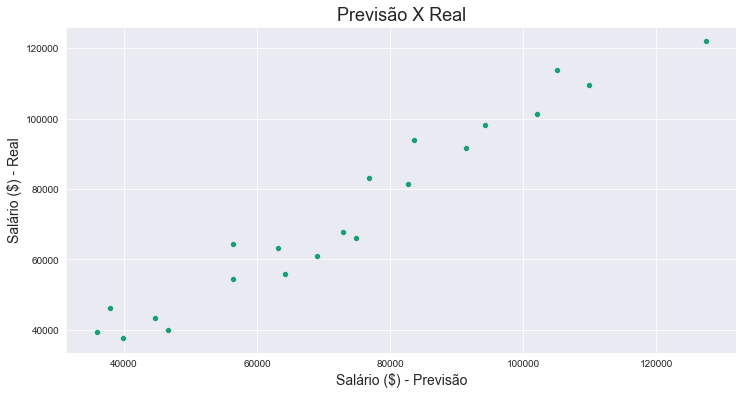

In [23]:
# Gráfico de dispersão entre valor estimado e valor real
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Salário ($) - Previsão', fontsize=14)
ax.set_ylabel('Salário ($) - Real', fontsize=14)
ax

In [24]:
residuo = y_train - y_previsto_train # Obtendo os resíduos

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Salário ($) - Previsão', ylabel='Resíduos'>

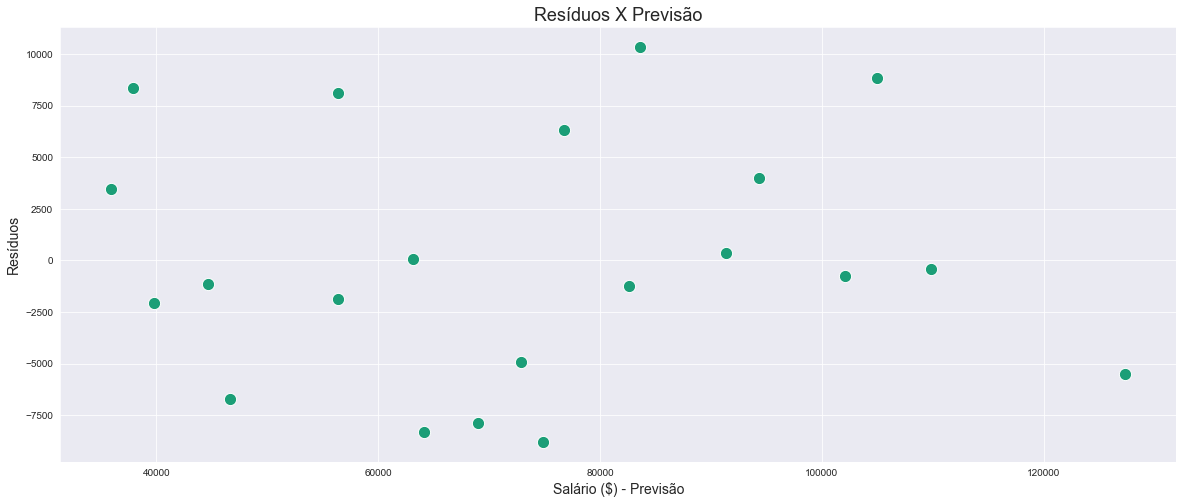

In [25]:
# Gráfico de dispersão entre valor estimado e resíduos / Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Salário ($) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos² X Previsão'}, xlabel='Salário ($) - Previsão', ylabel='Resíduos²'>

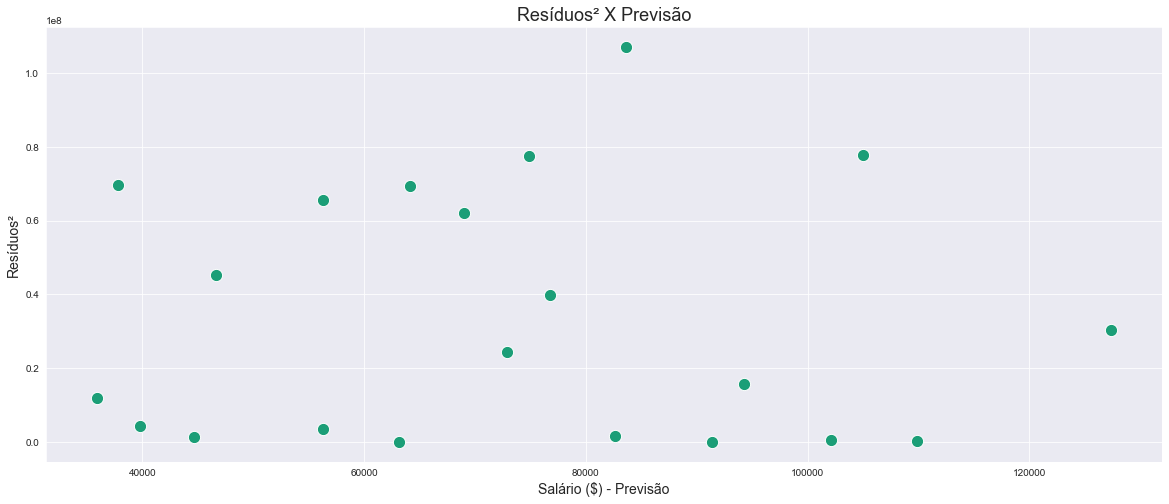

In [26]:
# Gráfico de dispersão entre valor estimado e resíduos / Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos² X Previsão', fontsize=18)
ax.set_xlabel('Salário ($) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Salário ($)', ylabel='Densidade'>

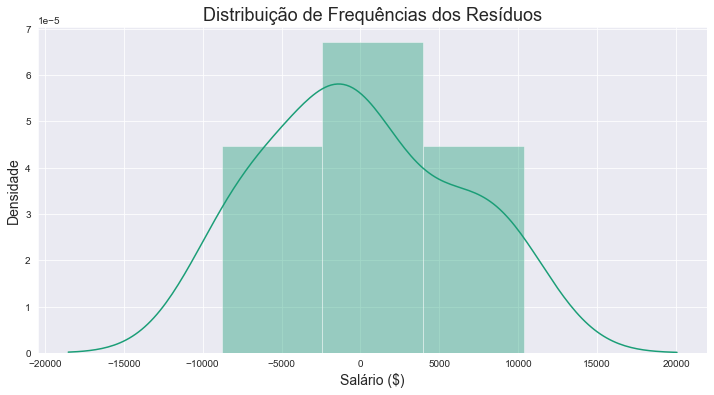

In [27]:
# Plotando a distribuição de frequências dos resíduos
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Salário ($)', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
ax

In [28]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2) #menor -> melhor
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2) #menor -> melhor
R2 = metrics.r2_score(y_test, y_previsto).round(2) #maior -> melhor

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,30310299.04
REQM,5505.48
R²,0.96
